## Исследование данных о российском кинопрокате



**Описание проекта**

Заказчик этого исследования — Министерство культуры Российской Федерации.
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.

Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Описание данных**

Таблица **mkrf_movies** содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Обратите внимание, что столбец **budget** уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица **mkrf_shows** содержит сведения о показах фильмов в российских кинотеатрах.
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

### Шаг 1. Открытие файлов с данными и объединение их в один датафрейм. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pth1 = '/datasets/mkrf_movies.csv'
pth2 = 'E:\Файлы Галя\Yandex_practicum\Datasets\mkrf_movies.csv'
if os.path.exists(pth1):
    mkrf_movies = pd.read_csv(pth1)
elif os.path.exists(pth2):
    mkrf_movies = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

In [3]:
pth1 = '/datasets/mkrf_shows.csv'
pth2 = 'E:\Файлы Галя\Yandex_practicum\Datasets\mkrf_shows.csv'
if os.path.exists(pth1):
    mkrf_shows = pd.read_csv(pth1)
elif os.path.exists(pth2):
    mkrf_shows = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

In [4]:
mkrf_movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [5]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
mkrf_shows.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [7]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объединение будет по столбцу puNumber

In [8]:
sorted(mkrf_movies['puNumber'].unique())

[' 111004112',
 '111000110',
 '111000111',
 '111000112',
 '111000113',
 '111000114',
 '111000115',
 '111000116',
 '111000117',
 '111000118',
 '111000119',
 '111000210',
 '111000211',
 '111000212',
 '111000213',
 '111000214',
 '111000215',
 '111000216',
 '111000217',
 '111000218',
 '111000219',
 '111000310',
 '111000311',
 '111000312',
 '111000313',
 '111000314',
 '111000315',
 '111000317',
 '111000318',
 '111000319',
 '111000410',
 '111000411',
 '111000412',
 '111000413',
 '111000414',
 '111000415',
 '111000416',
 '111000417',
 '111000418',
 '111000419',
 '111000510',
 '111000511',
 '111000512',
 '111000513',
 '111000514',
 '111000515',
 '111000516',
 '111000517',
 '111000518',
 '111000519',
 '111000610',
 '111000611',
 '111000612',
 '111000613',
 '111000614',
 '111000615',
 '111000616',
 '111000617',
 '111000618',
 '111000619',
 '111000710',
 '111000711',
 '111000712',
 '111000714',
 '111000715',
 '111000716',
 '111000717',
 '111000718',
 '111000719',
 '111000810',
 '111000811',
 '111

Видим пробел в начале, нужно исправить значения в столбце puNumber.

In [9]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].replace(' 111004112', '111004112')

In [10]:
sorted(mkrf_movies['puNumber'].unique())

['111000110',
 '111000111',
 '111000112',
 '111000113',
 '111000114',
 '111000115',
 '111000116',
 '111000117',
 '111000118',
 '111000119',
 '111000210',
 '111000211',
 '111000212',
 '111000213',
 '111000214',
 '111000215',
 '111000216',
 '111000217',
 '111000218',
 '111000219',
 '111000310',
 '111000311',
 '111000312',
 '111000313',
 '111000314',
 '111000315',
 '111000317',
 '111000318',
 '111000319',
 '111000410',
 '111000411',
 '111000412',
 '111000413',
 '111000414',
 '111000415',
 '111000416',
 '111000417',
 '111000418',
 '111000419',
 '111000510',
 '111000511',
 '111000512',
 '111000513',
 '111000514',
 '111000515',
 '111000516',
 '111000517',
 '111000518',
 '111000519',
 '111000610',
 '111000611',
 '111000612',
 '111000613',
 '111000614',
 '111000615',
 '111000616',
 '111000617',
 '111000618',
 '111000619',
 '111000710',
 '111000711',
 '111000712',
 '111000714',
 '111000715',
 '111000716',
 '111000717',
 '111000718',
 '111000719',
 '111000810',
 '111000811',
 '111000812',
 '1110

In [11]:
#проверим пропуски
mkrf_movies['puNumber'].isna().sum()

0

Пропусков теперь нет, но есть значения "нет", исправим их на 0. (Это было обнаружено при попытке изменить тип данных столбца puNumber, код выдал ошибку из-за наличия значений "нет")

In [12]:
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет', 'puNumber'] = 0

In [13]:
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'])

Все успешно. Теперь можно соединять. Сначала проверим, нет ли лицензий, равных нулю.

In [14]:
mkrf_shows[mkrf_shows['puNumber'] == 0].count()

puNumber      0
box_office    0
dtype: int64

In [15]:
df = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Датафреймы объединили, при этом имеется 3158 значений кассовых сборов в рублях, при этом нужно обратить внимание, что в столбце с номерами прокатных удостоверений присутствуют нулевые значения, которые возникли в результате замены значений "нет" (их не нужно будет обрабатывать в следующих этапах).

Теперь можно переходить к следующему этапу.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

Нужно **show_start_date** перевести в тип datetime;

In [17]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

С остальными типами данных все в порядке

#### Шаг 2.2. Изучим пропуски в датафрейме

Есть пропуски:
* В **film_studio**. Всего 18 пропусков;
* Пропуски в **production_country**. Всего 2 пропуска;
* Пропуски в **director**. Всего 9 пропусков;
* В **producer** - 568 пропусков;
* Пропущена значительная часть данных в **refundable_support**, **nonrefundable_support**, **budget**, **financing_source**, но в описании указано, что эти данные указаны только для тех фильмов, которые получили государственную поддержку. Также бюджет этих фильмов указан с учетом государственной поддержки;
* Пропуски в **ratings**. Всего 967 пропусков;
* Пропуски в **genres**. Всего 976 пропусков; 
* Пропуски в **box_office**, которые возникли после объединения датафреймов. 

- Проверим пропуски в столбце **film_studio**

In [19]:
df[df['film_studio'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим информацию по каждому фильму в Яндексе (в частости на Кинопоиске).

По данным на Кинопоиске нашлась информация для некоторых фильмов:

In [20]:
df.loc[1293, 'film_studio'] = 'Biscuit Pictures, Contemptible Entertainment, Mission Filmworks'
df.loc[4441, 'film_studio'] = 'Concept Space / Prostranstvo Idey'
df.loc[6105, 'film_studio'] = 'Pravda Films'
df.loc[6181, 'film_studio'] = 'Продюсерский центр «Молодёжные инициативы»'

In [21]:
df[df['film_studio'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6498,В плену города грёз,112014818,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,В.Витовцев,О.Мичи,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.9,"фантастика,боевик,триллер",NaN
6499,Последнее фото,112014518,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,Е.Севастьянов,Е.Севастьянов,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6507,Мой селфхарм,113001918,2018-12-06 12:00:00+00:00,Научно-популярный,NaN,Россия,Я.Лаптев (псевдоним Яков Раскалов),Я.Лаптев (псевдоним Яков Раскалов),«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6511,Обстоятельства места и времени,112015018,2018-12-12 12:00:00+00:00,Документальный,NaN,Россия,Д.Кабаков,Д.Кабаков,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В остальных случаях оставим пропуски как есть, так как скорее всего эти фильмы были спонсированы не студией, а самим режиссером, поэтому студия не указана.

- Проверим пропуски в столбце **production_country**

In [22]:
df.loc[df['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Concept Space / Prostranstvo Idey,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Эти кинокартины из России, поэтому заменим пропуски на страну Россия

In [23]:
df.loc[df['production_country'].isna() == True, 'production_country'] = 'Россия'

In [24]:
df['production_country'].isna().sum()

0

- Проверим пропуски в столбце **director**

In [25]:
df.loc[df['director'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Concept Space / Prostranstvo Idey,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


- Проверим пропуски в столбце **ratings**

In [26]:
df.loc[df['ratings'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.0
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Оставим эти пропуски, так как заполнить их не получится, а удаление этих строк повлечет потерю большого количества данных.

- Проверим пропуски в столбце **genres**

In [27]:
df.loc[df['genres'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.0
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Оставим эти пропуски, так как заполнить их не получится, а удаление этих строк повлечет потерю большого количества данных.

#### Шаг 2.3. Дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты.

In [28]:
#Проверим наличие дубликатов
df.duplicated().sum()

0

Дубликатов по всему датафрейму нет, проверим отдельные столбцы, где возможно наличие дубликатов

- Проверим дубликаты в столбце **title**

In [29]:
df[df['title'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


In [30]:
df[df['title'] == 'Особо опасен']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [31]:
df[(df['title'].duplicated(keep=False)) & (df['box_office'].isna() == False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.00
111,Гарри Поттер и тайная комната /По роману Дж.К....,121026016,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хедэй Филмз/1492 Пикчерз",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.0,"фэнтези,приключения,семейный",1093810.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.00
114,Гарри Поттер и философский камень /По роману Д...,121025916,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз/1492 Пикчерз/Данк...",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1948760.00
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"фэнтези,приключения,семейный",843310.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918,Дитя тьмы,121010819,2019-05-23 12:00:00+00:00,Художественный,Брокен Миррор Фильм,Канада,Джереми Люттер,"Джереми Люттер, Жослин Расселл, Робин Чан",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.9,"ужасы,триллер,детектив",2276644.94
7281,Прощание,121028719,2019-10-07 12:00:00+00:00,Художественный,"Биг Бич Филмз, Депз оф Филд, Киндред Спирит",США,Лулу Ванг,"Анита Го, Даниэль Тейт Мелиа, Эндрю Миано",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,2617932.50
7289,Игра с огнем,121029319,2019-10-10 12:00:00+00:00,Художественный,"Йал Продакшнз, Хопскоч Пикчерз, Фильм Моуд Инт...",США,Майк Ган,"Джордан Бекман, Суки Чю",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.6,триллер,281077.00
7322,Успех,111018519,2019-11-04 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000.0,20000000.0,75000000.0,Фонд кино,7.8,драма,3181218.00


Получается, что есть одни и те же картины, которые выходили в прокат неоднократно, поэтому у них разные номера прокатных удостоверений. Эти дубликаты оставляем.

- Проверим дубликаты в столбце **puNumber**

In [32]:
df['puNumber'].duplicated().sum()

2

In [33]:
df[df['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [34]:
df[df['title'] == 'Как жениться и остаться холостым']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4520,Как жениться и остаться холостым,221142510,2010-12-03 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN


In [35]:
df[df['title'] == df.loc[4639, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4050,Иоанна - женщина на папском престоле /По роман...,121005410,2010-03-25 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
4513,Иоанна - женщина на папском престоле /По роман...,221141710,2010-12-03 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


In [36]:
df[df['title'] == 'Анализируй это!']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4553,Анализируй это!,221147310,2010-12-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN


In [37]:
df[df['title'] == 'Анализируй то!']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Полностью повторяющих строк нет. 

Есть дубли в названиях фильмов, это связано с неоднократной выдачей прокатных удостоверений на один и тот же фильм. Исправлять это не будем, так как может быть утерян номер прокатного удостоверения. 

Есть дубли в номерах прокатных удостоверений, это скорее всего связано с тем, что под одним удостоверением выходило в прокат несколько фильмов. Может, эти фильмы выходили в показ подряд. 

#### Шаг 2.4. Изучим категориальные значения

Во всех категориальных переменных значения разделены запятыми без пробелов (столбец с жанрами), для стран в качестве разделителя "-".

- Обработаем данные в столбце **type**

In [38]:
df['type'] = df['type'].str.strip()

In [39]:
df['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

- Обработаем данные в столбце **age_restriction**

In [40]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

- Обработаем данные в столбце **financing_source**

In [41]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

- Обработаем данные в столбце **genres**

In [42]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

В жанрах очень много разных вариаций, но оставим все как есть.

- Обработаем данные в столбце **ratings**

In [43]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видим значения в процентах, непонятно, откуда они взялись и что показывают. Поэтому заполним такие значения **nan**

In [44]:
strange_ratings = ['99%', '28%', '97%','83%', '64%',
                  '91%', '94%', '62%', '79%', '90%',
                  '19%', '88%', '89%', '98%']

In [45]:
df.query('ratings in @strange_ratings')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1.740000e+03
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4.295000e+03
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,1.429859e+06
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",5.287326e+08
2126,Поездка к матери,111002015,2015-03-02 12:00:00+00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.000000e+00
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,94%,"фантастика,боевик,комедия",3.347500e+05
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


In [46]:
df.loc[df['ratings'].isin(strange_ratings), 'ratings'] = np.nan

In [47]:
#проверка
df.query('ratings in @strange_ratings')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Так как мы не знаем, что выражают значения в процентах, избавились от них исправив такие значения на nan. 

Можно было предположить, что это рейтинг переведенный в проценты, но имеются числа довольно большие 99%, 97% и т.д, что очень сомнительно, если переведем в рейтинг от 0 до 10. Получатся значения 9.9 и тд, на своем опыте использования кинопоиска я не встречала оценок выше 9.0.

#### Шаг 2.5. Проверим количественные значения

In [48]:
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [49]:
columns = ['refundable_support', 'nonrefundable_support',
          'budget', 'box_office', 'ratings']

In [50]:
df[columns].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


Есть фильмы с нулевым бюджетом, посмотрим такие значения

In [51]:
df[df['budget'] == 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Несмотря на то, что у этих фильмов нулевой бюджет, есть такие фильмы, где сумма поддержки ненулевая. В этом случае бюджет не может быть меньше суммы поддержки. Проверим кинокартины, у которых бюджет меньше суммы возвратных и невозвратных средств.

In [52]:
df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Все же такие картины есть. Нужно исправить в этих строках бюджет на сумму поддержки. 

In [53]:
def correct_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']

In [54]:
df['budget'] = df.apply(correct_budget, axis=1)

In [55]:
df[columns].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.186446e+07,4.898099e+07,1.314224e+08,7.647870e+07
std,2.491656e+07,5.998012e+07,1.871482e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,6.000000e+06,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.552480e+07,8.623900e+04
50%,0.000000e+00,3.000000e+07,7.119690e+07,2.327988e+06
75%,1.500000e+07,4.037500e+07,1.500000e+08,2.397967e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


In [56]:
#проверка
df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Заменили нулевые значения бюджета, где сумма поддержки превышала значение бюджета. 

#### Шаг 2.6. Добавим новые столбцы

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [57]:
df['show_start_year'] = df['show_start_date'].dt.year

In [58]:
df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0,2013
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,2016
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,2014


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [59]:
df['director_first'] = df['director'].str.split(",").str[0]
df['director_first'] = df['director_first'].str.strip()
df['genre_first'] = df['genres'].str.split(",").str[0]
df['genre_first'] = df['genre_first'].str.strip()

In [60]:
df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first,genre_first
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0,2013,В.Меньшов,мелодрама
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,2016,Эрик Беснард,комедия
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [61]:
df['ratio_help_to_budget'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

In [62]:
df[df['ratio_help_to_budget'].isna()==False]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first,genre_first,ratio_help_to_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04,2014,А.Якимчук,NaN,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,0.510204
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,0.526316
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.529661
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,0.649998


### Шаг 3. Исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. При этом данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Данные проката известны для тех фильмов, которые показывали в кинотеатре, то есть имели сборы в России, а это отображено в данных столбца **box_office**

In [63]:
df.groupby('show_start_year')['box_office'].count().sum()

3158

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7472 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Да, все верно, количество данных совпало.

In [65]:
# создадим таблицу с данными количества прокатных фильмов по годам
rental_movie = df.groupby('show_start_year')['box_office'].count().reset_index()
rental_movie_count = df.groupby('show_start_year')['title'].count().reset_index()
rental = rental_movie_count.merge(rental_movie, how='left', on='show_start_year')
rental.rename(columns={'box_office' : 'movies_in_cinema_count', 'title' : 'all_movies_count'}, inplace=True)
rental['cinema_part, %'] = rental['movies_in_cinema_count']*100/rental['all_movies_count']
rental

,show_start_year,all_movies_count,movies_in_cinema_count,"cinema_part, %"
0,2010,985,105,10.659898
1,2011,622,109,17.524116
2,2012,593,128,21.585160
3,2013,630,184,29.206349
4,2014,807,279,34.572491
5,2015,705,465,65.957447
6,2016,818,526,64.303178
7,2017,505,357,70.693069
8,2018,891,475,53.310887
9,2019,930,530,56.989247


Для наглядности данных построим гистограммы:

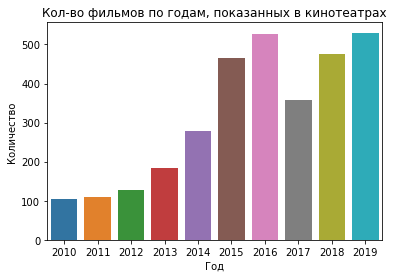

In [66]:
sns.barplot(x='show_start_year', y='movies_in_cinema_count', data=rental);
plt.title('Кол-во фильмов по годам, показанных в кинотеатрах');
plt.xlabel('Год');
plt.ylabel('Количество');

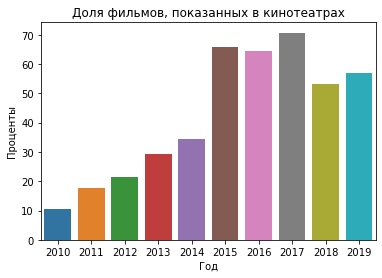

In [67]:
sns.barplot(x='show_start_year', y='cinema_part, %', data=rental);
plt.title('Доля фильмов, показанных в кинотеатрах');
plt.xlabel('Год');
plt.ylabel('Проценты');

Количество фильмов, показанных в кинотеатре (выпущенных в прокат) наибольшее в 2016 году, но если судить о доле фильмов, выпущенных в прокат, то больший процент наблюдается в 2017 году. При этом в 2015-2017 годах процент показанных фильмов выше, чем в остальные года. 

- Изучим, как менялась динамика проката по годам.

In [68]:
money = df.groupby('show_start_year')['box_office'].agg('sum')
money

show_start_year
2010    2.428654e+06
2011    1.410276e+07
2012    6.955423e+06
2013    2.979971e+07
2014    7.444952e+09
2015    3.949737e+10
2016    4.786630e+10
2017    4.856371e+10
2018    4.966840e+10
2019    4.842571e+10
Name: box_office, dtype: float64

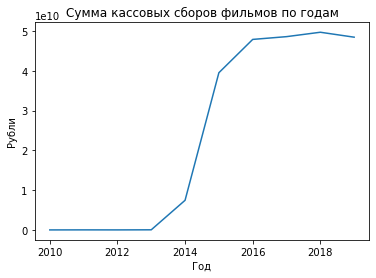

In [69]:
sns.lineplot(data=money)
plt.title('Сумма кассовых сборов фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Рубли');
plt.show()

С 2014 года наблюдается рост сумм кассовых сборов вплоть до 2018 года. С 2010 по 2013 года сумма сборов была примерно на одном уровне низкой. 

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [70]:
m_money = df.groupby('show_start_year')['box_office'].agg(['mean', 'median'])

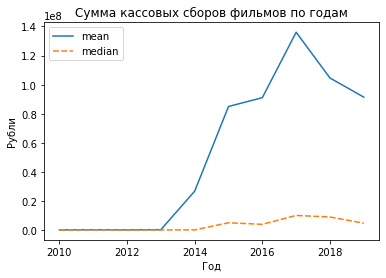

In [71]:
sns.lineplot(data=m_money)
plt.title('Сумма кассовых сборов фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Рубли');
plt.show()

Максимальная сумма сборов была в 2017 году, это показывает и среднее, и медианное значение. Среднее значения достаточно больше, чем медианное, так как имеется большой разброс в сумме кассовых сборов между минимальным и максимальным значением.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Узнаем, фильмы с каким возрастным ограничением собрали больше всего денег в прокате, меняется ли картина в зависимости от года.

In [72]:
df.query('2015 <= show_start_year').groupby('age_restriction')['box_office'].sum().sort_values()

age_restriction
«0+» - для любой зрительской аудитории    8.090774e+08
«18+» - запрещено для детей               4.075962e+10
«6+» - для детей старше 6 лет             5.579861e+10
«12+» - для детей старше 12 лет           6.061945e+10
«16+» - для детей старше 16 лет           7.603473e+10
Name: box_office, dtype: float64

In [73]:
age = df.query('2015 <= show_start_year').groupby(['show_start_year', 'age_restriction'])['box_office'].agg('sum').reset_index()
age

,show_start_year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,3.790546e+08
1,2015,«12+» - для детей старше 12 лет,1.361608e+10
2,2015,«16+» - для детей старше 16 лет,1.136812e+10
3,2015,«18+» - запрещено для детей,5.432308e+09
4,2015,«6+» - для детей старше 6 лет,8.701799e+09
5,2016,«0+» - для любой зрительской аудитории,1.502288e+08
6,2016,«12+» - для детей старше 12 лет,1.220445e+10
7,2016,«16+» - для детей старше 16 лет,1.666455e+10
8,2016,«18+» - запрещено для детей,6.793930e+09
9,2016,«6+» - для детей старше 6 лет,1.205315e+10


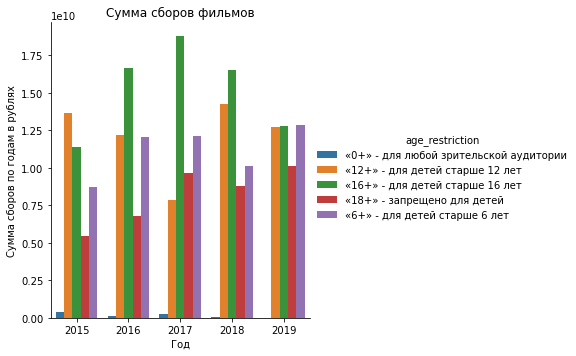

In [74]:
sns.catplot(x='show_start_year', y='box_office', hue='age_restriction', data=age, kind='bar');
plt.title('Сумма сборов фильмов');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам в рублях');

Наибольшая сумма сборов наблюдается в 2017 году при показе фильмов с возрастным рейтингом 16+. При этом с 2015 года по 2017 год сборы с фильмов этого рейтинга возрастали, а затем пошли на убыль. И в 2019 году сборы фильмов с рейтингами 12+, 16+ и 6+ сравнялись. 

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

In [75]:
#создадим новый датафрейм, содержащий данные о фильмах, которые получили господдержку
support = df[df['budget'].isna() == False].copy()
support

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first,genre_first,ratio_help_to_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04,2014,А.Якимчук,NaN,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,0.510204
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,0.526316
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.529661
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,0.649998


In [76]:
#добавим столбец с общей суммой поддержки
support['total_support'] = support['refundable_support'] + support['nonrefundable_support']

#добавим столбец с окупаемостью
support['payback'] = support['box_office'] - support['budget']

#добавим столбец с долей поддержки в общем бюджете
support['part'] = support['total_support']/support['budget']

In [77]:
support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

In [78]:
support.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,show_start_year,director_first,genre_first,ratio_help_to_budget,total_support,payback,part
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.333703,26500000.0,-79046546.4,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,NaN,NaN,28140.0,2014,А.Якимчук,NaN,0.700000,26000000.0,-37114717.0,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.612691,107847945.0,-156066458.5,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095,28000000.0,-40518222.5,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,6.4,драма,232100.0,2014,М.Угаров,драма,0.624764,25000000.0,-39783022.0,0.624764
1854,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,...,6.1,"мультфильм,фэнтези,история",15078858.6,2015,С.Серегин,мультфильм,0.482160,25000000.0,-36771141.4,0.482160
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.0,...,8.5,"драма,военный,история",249166767.7,2015,Р.Давлетьяров,драма,0.680000,150000000.0,28578373.7,0.680000
1871,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,...,6.7,драма,4731239.5,2014,В.Глаголева,драма,0.539407,46502299.0,-81478827.5,0.539407
1903,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,...,7.0,"триллер,боевик,приключения",352804320.4,2015,А.Войтинский,триллер,0.537436,75000000.0,213252817.4,0.537436
1912,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,...,7.4,"фэнтези,приключения,драма",51907.5,2015,Д.Федоров,фэнтези,0.700000,34000000.0,-48519522.5,0.700000


In [79]:
support.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office,show_start_year,ratio_help_to_budget,total_support,payback,part
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.180000e+02,332.000000,332.000000,3.320000e+02,3.180000e+02,332.000000
mean,1.115938e+08,1.186446e+07,4.898099e+07,1.314224e+08,1.324324e+08,2016.719880,0.542098,6.084545e+07,4.256980e+05,0.542098
std,5.703031e+06,2.491656e+07,5.998012e+07,1.871482e+08,3.348379e+08,1.640637,0.196925,7.275546e+07,3.159104e+08,0.196925
min,1.110001e+08,0.000000e+00,0.000000e+00,6.000000e+06,1.550000e+03,2013.000000,0.044043,3.000000e+06,-1.971477e+09,0.044043
25%,1.110049e+08,0.000000e+00,2.500000e+07,4.552480e+07,1.236676e+06,2015.000000,0.384615,2.533375e+07,-7.069443e+07,0.384615
50%,1.110104e+08,0.000000e+00,3.000000e+07,7.119690e+07,1.572007e+07,2017.000000,0.614038,3.500000e+07,-4.068082e+07,0.614038
75%,1.110178e+08,1.500000e+07,4.037500e+07,1.500000e+08,1.063730e+08,2018.000000,0.661412,6.000000e+07,-2.362182e+06,0.661412
max,2.140101e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09,2019.000000,1.000000,5.000000e+08,2.913569e+09,1.000000


Из представленных данных видно, что примерно половина бюджета таких фильмов - господдержка.

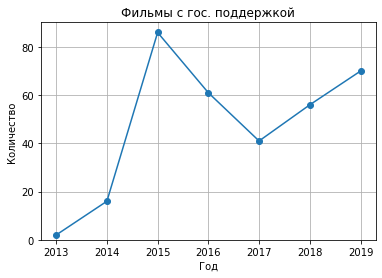

In [80]:
support.groupby('show_start_year')['total_support'].count().plot(ylim=0, grid=True, style='o-');
plt.title('Фильмы с гос. поддержкой');
plt.xlabel('Год');
plt.ylabel('Количество');

В 2015 году наблюдается наибольшее число фильмов, финансированных государством. Скорее всего это связано с усилением пропаганды в связи с аннексией Крыма и вооруженным конфликтом на востоке Украины (но это не точно). 

In [81]:
support.groupby('show_start_year')['total_support'].sum()

show_start_year
2013    1.343479e+08
2014    5.720023e+08
2015    3.656241e+09
2016    4.303155e+09
2017    3.183972e+09
2018    3.446969e+09
2019    4.904000e+09
Name: total_support, dtype: float64

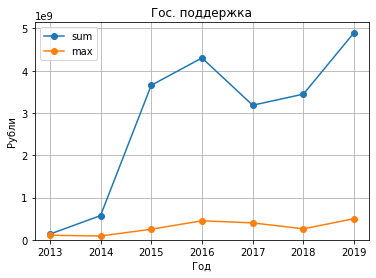

In [82]:
support.groupby('show_start_year')['total_support'].agg(['sum', 'max']).plot(grid=True, ylim=0, style='o-');
plt.title('Гос. поддержка');
plt.xlabel('Год');
plt.ylabel('Рубли');

Суммы господдержки росли с 2014 по 2016 год. Затем наблюдается небольшой спад с последующим ростом. Максимальные же значения оставались примерно на одном уровне.

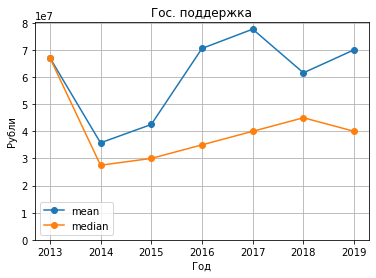

In [83]:
support.groupby('show_start_year')['total_support'].agg(['mean', 'median']).plot(grid=True, ylim=0, style='o-');
plt.title('Гос. поддержка');
plt.xlabel('Год');
plt.ylabel('Рубли');

In [84]:
support.loc[support['ratings'].isna()==True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,show_start_year,director_first,genre_first,ratio_help_to_budget,total_support,payback,part
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,NaN,NaN,2.814000e+04,2014,А.Якимчук,NaN,0.700000,26000000.0,-3.711472e+07,0.700000
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,...,NaN,"фантастика,боевик,комедия",3.347500e+05,2015,Ю.Кара,фантастика,0.250000,10000000.0,-3.966525e+07,0.250000
2150,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30 12:00:00+00:00,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,«18+» - запрещено для детей,0.0,...,NaN,NaN,1.982000e+04,2015,К.Сухарьков,NaN,0.668963,25000000.0,-3.735144e+07,0.668963
2451,ПРАЗДНИК НЕПОСЛУШАНИЯ,111016215,2015-08-28 12:00:00+00:00,Художественный,"АНО ""Творческая студия ""Стелла""",Россия,"В.Харченко, А.Волков",Ф.Попов,«6+» - для детей старше 6 лет,0.0,...,NaN,NaN,1.825100e+05,2015,В.Харченко,NaN,0.692868,34000000.0,-4.888892e+07,0.692868
2817,Иерей-Сан. Исповедь самурая. ПОСТАНОВЛЕНИЕМ СУ...,111019315,2015-11-17 12:00:00+00:00,Художественный,"ООО ""Студия Ортодокс""",Россия,Е.Баранов,"Л.Калинский, И.Охлобыстин, Г.Палагаев",«16+» - для детей старше 16 лет,25000000.0,...,NaN,NaN,1.101181e+07,2015,Е.Баранов,NaN,0.540016,40000000.0,-6.306010e+07,0.540016
2999,Жили-были мы,111008716,2016-05-12 12:00:00+00:00,Художественный,"ООО ""Русские Золотые Серии""",Россия,А.Чернакова,"А.Чернакова, Ю.Сапронов",«0+» - для любой зрительской аудитории,0.0,...,NaN,NaN,6.588700e+05,2016,А.Чернакова,NaN,0.500837,35000000.0,-6.922418e+07,0.500837
3061,Первая Мировая война WWI,111000716,2016-01-25 12:00:00+00:00,Художественный,"ООО ""Корнер Ворк""",Россия,И.Угольников,И.Угольников,«12+» - для детей старше 12 лет,0.0,...,NaN,NaN,8.781000e+04,2016,И.Угольников,NaN,0.658781,30000000.0,-4.545084e+07,0.658781
3139,Я умею вязать,111019615,2015-11-27 12:00:00+00:00,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.0,...,NaN,драма,8.013700e+05,2015,Н.Степанова при участии С.Иванова,драма,0.324979,4700000.0,-1.366109e+07,0.324979
3385,О любви (2017),111018816,2016-12-28 12:00:00+00:00,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,В.Бортко,Н.Бортко,«16+» - для детей старше 16 лет,20000000.0,...,NaN,NaN,1.133241e+07,2016,В.Бортко,NaN,0.784745,55000000.0,-5.875403e+07,0.784745
3389,Как Витька Чеснок вёз Лёху штыря в дом инвалидов,111005017,2017-06-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""ВГИК - Дебют""",Россия,А.Хант,"В.Мадышев, Ф.Попов",«18+» - запрещено для детей,0.0,...,NaN,NaN,5.503875e+06,2017,А.Хант,NaN,0.649351,25000000.0,-3.299612e+07,0.649351


Имеем 18 строк с пропусками в рейтинге, которые составляют 5,4% от всех данных таблицы support, поэтому удалим их, чтобы они не мешали дальнейшему анализу.

In [85]:
#удалим строки с помощью цикла
delete = support.loc[support['ratings'].isna()==True].index
drop_index=0
try:
    for drop_str in delete:
        df = df.drop(drop_str)
        drop_index+=1
except:
    print('Не удалось удалить строку')
print("Удалено строк: ", drop_index)

support = support.reset_index()
print("Всего осталось строк:", len(support))

Удалено строк:  18
Всего осталось строк: 332


In [86]:
support['ratings'].dtype

dtype('O')

Исправим тип данных рейтинга в числовой:

In [87]:
support['ratings'] = pd.to_numeric(support['ratings'])

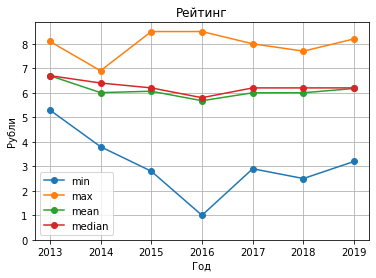

In [88]:
support.groupby('show_start_year')['ratings'].agg(['min', 'max', 'mean', 'median']).plot(grid=True, ylim=0, style='o-')
plt.title('Рейтинг');
plt.xlabel('Год');
plt.ylabel('Рубли');

Если смотреть по медиане рейтинга, то в 2016 выпускали наименее качественные фильмы (по мнению тех, кто оценивал этот фильм). Если смотреть среднюю сумму поддержки на каждый фильм, то в 2017 году была самая большая сумма на фильм, а по медиане в 2018 году.

При этом наивысшие оценки кинокартин были в 2015-2016 годах, тогда как в эти же годы наблюдался рост сумм государственной поддержки. Возможно это свзязано, так как с ростом финансирования растет общий бюджет фильма, а соответственно и качество фильмов, поэтому такие фильмы вполне могут получать высокие оценки.

Однако, наименьший рейтинг также наблюдается в 2016 году, при этом эта оценка стоит на уровне едииницы (видимо совсем кошмарный фильм был), что подвергает сомнению предыдущий вывод. 

А медиана и средние значение идут почти бок о бок с совсем небольшой разницей: с 2013 по 2016 года оценка фильмов падала, а затем наблюдался небольшой рост. 
Это наталкивает на мысль, что все же с увеличением господдержки увеличивается рейтинг не всех фильмов. Скорее всего были лишь какие-то отдельные кинокартины, которые покорили сердца зрителей. Именно они могли повысить рост среднего и медианного значения.

In [89]:
support.corr()

,index,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,ratio_help_to_budget,total_support,payback,part
index,1.000000,-0.013204,0.102121,0.130158,0.182302,0.064807,0.157834,0.961970,-0.113536,0.142277,0.058163,-0.113536
puNumber,-0.013204,1.000000,0.010413,-0.030194,-0.016573,0.038466,0.053665,-0.017975,0.010212,-0.021326,-0.009130,0.010212
refundable_support,0.102121,0.010413,1.000000,0.359622,0.654865,0.004850,0.312137,0.089616,0.003491,0.638945,-0.041968,0.003491
nonrefundable_support,0.130158,-0.030194,0.359622,1.000000,0.621026,0.141521,0.455729,0.117645,0.132406,0.947567,0.138162,0.132406
budget,0.182302,-0.016573,0.654865,0.621026,1.000000,0.101342,0.375631,0.164391,-0.283001,0.736250,-0.187338,-0.283001
ratings,0.064807,0.038466,0.004850,0.141521,0.101342,1.000000,0.155149,0.044702,-0.049547,0.118287,0.095602,-0.049547
box_office,0.157834,0.053665,0.312137,0.455729,0.375631,0.155149,1.000000,0.119278,-0.084591,0.488976,0.839991,-0.084591
show_start_year,0.961970,-0.017975,0.089616,0.117645,0.164391,0.044702,0.119278,1.000000,-0.092796,0.127678,0.027103,-0.092796
ratio_help_to_budget,-0.113536,0.010212,0.003491,0.132406,-0.283001,-0.049547,-0.084591,-0.092796,1.000000,0.110352,0.085326,1.000000
total_support,0.142277,-0.021326,0.638945,0.947567,0.736250,0.118287,0.488976,0.127678,0.110352,1.000000,0.099607,0.110352


По таблице корреляции можно увидеть, что с возрастанием государственной поддержки растет и бюджет фильмов, а рейтинг вообще мало зависит от бюджета или господдержки.

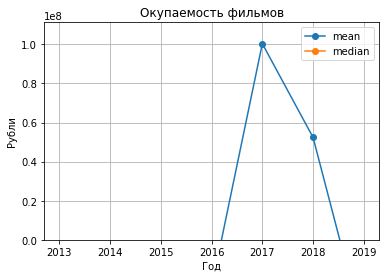

In [90]:
support.groupby('show_start_year')['payback'].agg(['mean', 'median']).plot(grid=True, ylim=0, style='o-');
plt.title('Окупаемость фильмов');
plt.xlabel('Год');
plt.ylabel('Рубли');

По графику видим, что все-таки фильмы чаще всего не окупались, так как мы даже не видим график медианы (скорее всего он лежит в отрицательной плоскости)

In [91]:
#посмотрим и убедимся в этом с помощью таблицы
support.groupby('show_start_year')['payback'].describe()

,count,mean,std,min,25%,50%,75%,max
show_start_year,,,,,,,,
2013,2.0,-1.175565e+08,5.446130e+07,-1.560665e+08,-1.368115e+08,-1.175565e+08,-9.830152e+07,-7.904655e+07
2014,16.0,-1.781641e+07,1.029261e+08,-1.791689e+08,-5.172352e+07,-3.812277e+07,-2.369749e+07,3.159429e+08
2015,85.0,-2.248688e+07,1.341452e+08,-4.274217e+08,-5.955475e+07,-3.880566e+07,-2.579160e+07,5.524097e+08
2016,60.0,-2.424215e+07,1.778445e+08,-3.199154e+08,-8.170128e+07,-5.200880e+07,-2.611358e+07,7.883215e+08
2017,39.0,1.003462e+08,4.421688e+08,-5.211304e+08,-6.195880e+07,-3.322228e+07,3.957714e+07,2.189494e+09
2018,56.0,5.238223e+07,3.304587e+08,-3.546741e+08,-9.553733e+07,-3.759403e+07,2.223890e+07,1.707969e+09
2019,60.0,-4.709077e+07,4.848709e+08,-1.971477e+09,-1.072307e+08,-4.590981e+07,-2.504775e+07,2.913569e+09


Да, действительно, более менее окупались фильмы (по средним значениям) разве что в 2017-2018 годах.

### Шаг 5. Общий вывод

Рассмотрели данные, предоставленные Министерством культуры. Выявили следующее:

- Больше всего фильмов было показано в кинотеатрах в 2019 году, чуть меньше - в 2016.
- Минимальная сумма сборов была в 2015, максимальная в 2018.
- Наибольшая средняя сумма сборов приходится на 2017 год.
- Наблюдался рост сборов за фильмы 16+ к 2017 году, а затем спад с уравниванием сборов фильмов по категориям 6+, 12+ и 16+.
- Наибольшая сумма государственной поддержки оказалась в 2019 году, чуть меньше - в 2016. Но в среднем по медиане самый большой бюджет на каждый фильм приходится на 2018 год. 
- Низший рейтинг фильмов, снятых при поддержке государства, были в прокате в 2016 году. При этом выяснилось, что на рейтинг фильма увеличение суммы поддержки влияет не сильно. К тому же с увеличением государственной поддержки окупаемость фильмов российского производства не возрастает.
